In [1]:
import math

import import_ipynb
from utils import df_from_csv, to_be_checked, is_corr_ok, plot_hist, plot_boxes, plot_lines, df_to_csv, drop_pm25_outliers

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 Clean Data

In [2]:
# Load Raw Data
df_pm25_raw = df_from_csv("pm25_raw.csv")

# Check Data Types
print(df_pm25_raw.dtypes)

df_pm25_raw.head()

TANGARA_2BBA    float64
TANGARA_25CE    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,,,
2023-10-01 22:58:00-05:00,4.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2023-10-01 22:58:30-05:00,3.0,NaN,3.0,7.0,4.0,1.0,7.0,7.0,4.0,3.0,4.0,5.0,6.0,NaN,0.0
2023-10-01 22:59:00-05:00,4.0,NaN,4.0,9.0,3.0,1.0,7.0,5.0,4.0,4.0,3.0,3.0,5.0,NaN,0.0
2023-10-01 22:59:30-05:00,3.0,NaN,NaN,9.0,3.0,2.0,7.0,4.0,4.0,4.0,3.0,3.0,4.0,NaN,0.0
2023-10-01 23:00:00-05:00,4.0,NaN,3.0,8.0,3.0,1.0,7.0,5.0,4.0,4.0,4.0,4.0,2.0,NaN,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_raw.describe()

,TANGARA_2BBA,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,5960.000000,1379.000000,5827.000000,5781.000000,2798.000000,5546.000000,5534.000000,5796.000000,5535.000000,5802.000000,5625.000000,5713.000000,5911.000000,4408.000000,5919.000000
mean,7.645638,0.213198,9.940621,14.764401,10.601858,12.357735,9.505240,9.108006,9.455465,10.665805,11.283733,7.448976,9.244967,9.614111,0.002196
std,3.593537,0.414995,9.884099,53.861107,8.213030,12.479771,4.623339,6.157025,4.677275,4.780675,6.759604,5.271936,25.383833,6.147248,0.050297
min,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5.000000,0.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,7.000000,7.000000,7.000000,4.000000,4.000000,5.000000,0.000000
50%,7.000000,0.000000,9.000000,8.000000,9.000000,9.000000,9.000000,7.000000,9.000000,10.000000,10.000000,6.000000,7.000000,9.000000,0.000000
75%,10.000000,0.000000,12.000000,15.000000,12.000000,15.000000,13.000000,12.000000,12.000000,13.000000,15.000000,10.000000,11.000000,12.000000,0.000000
max,41.000000,3.000000,299.000000,2061.000000,78.000000,257.000000,23.000000,109.000000,29.000000,101.000000,77.000000,135.000000,1526.000000,66.000000,2.000000


## Missing Data

In [4]:
# Missing Data Threshold
threshold = 90
print(f'Threshold: {threshold}%')

# For each Tangara sensor
for id_tangara_sensor in df_pm25_raw.columns:
    df_pm25_sensor = df_pm25_raw[[id_tangara_sensor]]
    # To be checked
    is_ok, data_percent, missing_data_percent = to_be_checked(df_pm25_sensor, threshold)
    if not is_ok:
        print(f"Tangara Sensor: {id_tangara_sensor}, Data: {data_percent}%, Missing: {missing_data_percent}%, To be checked")

Threshold: 90%
Tangara Sensor: TANGARA_2BBA, Data: 41%, Missing: 59%, To be checked
Tangara Sensor: TANGARA_25CE, Data: 10%, Missing: 90%, To be checked
Tangara Sensor: TANGARA_260A, Data: 40%, Missing: 60%, To be checked
Tangara Sensor: TANGARA_4B1A, Data: 40%, Missing: 60%, To be checked
Tangara Sensor: TANGARA_14D6, Data: 19%, Missing: 81%, To be checked
Tangara Sensor: TANGARA_1EE6, Data: 39%, Missing: 61%, To be checked
Tangara Sensor: TANGARA_2B42, Data: 38%, Missing: 62%, To be checked
Tangara Sensor: TANGARA_2E9A, Data: 40%, Missing: 60%, To be checked
Tangara Sensor: TANGARA_2FF6, Data: 38%, Missing: 62%, To be checked
Tangara Sensor: TANGARA_307A, Data: 40%, Missing: 60%, To be checked
Tangara Sensor: TANGARA_1712, Data: 39%, Missing: 61%, To be checked
Tangara Sensor: TANGARA_48C6, Data: 40%, Missing: 60%, To be checked
Tangara Sensor: TANGARA_532E, Data: 41%, Missing: 59%, To be checked
Tangara Sensor: TANGARA_F1AE, Data: 31%, Missing: 69%, To be checked
Tangara Sensor: TAN

## Data Correlation

In [5]:
# Data Correlation Threshold
threshold = 0.9
print(f'Threshold: {threshold}%')

ID_REFE_TANGARA_SENSOR='TANGARA_06BE'
ID_TARG_TANGARA_SENSOR='TANGARA_2FF6'
# Reference Tangara Sensor
df_reference_sensor = df_pm25_raw[ID_REFE_TANGARA_SENSOR]
# Target Tangara Sensor
df_target_sensor = df_pm25_raw[ID_TARG_TANGARA_SENSOR]

# To be checked
if not math.isnan(df_reference_sensor.std()):
    is_ok, corr = is_corr_ok(df_reference_sensor, df_target_sensor, threshold)
    if not is_ok:
        print(f"Reference Tangara Sensor: {ID_REFE_TANGARA_SENSOR}, Target Tangara Sensor: {ID_TARG_TANGARA_SENSOR}, Correlation: {corr}, To be checked")

# For each Tangara sensor
# for id_tangara_sensor in df_pm25_raw.columns:
#     # Target Tangara Sensor
#     df_target_sensor = df_pm25_raw[id_tangara_sensor]
#     # To be checked
#     is_ok, corr = is_corr_ok(df_reference_sensor, df_target_sensor, threshold)
#     if not is_ok:
#         print(f"Reference Tangara Sensor: {ID_REFE_TANGARA_SENSOR}, Target Tangara Sensor: {id_tangara_sensor}, Correlation: {corr}, To be checked")

Threshold: 0.9%
Reference Tangara Sensor: TANGARA_06BE, Target Tangara Sensor: TANGARA_2FF6, Correlation: 0.0, To be checked


## Histograms

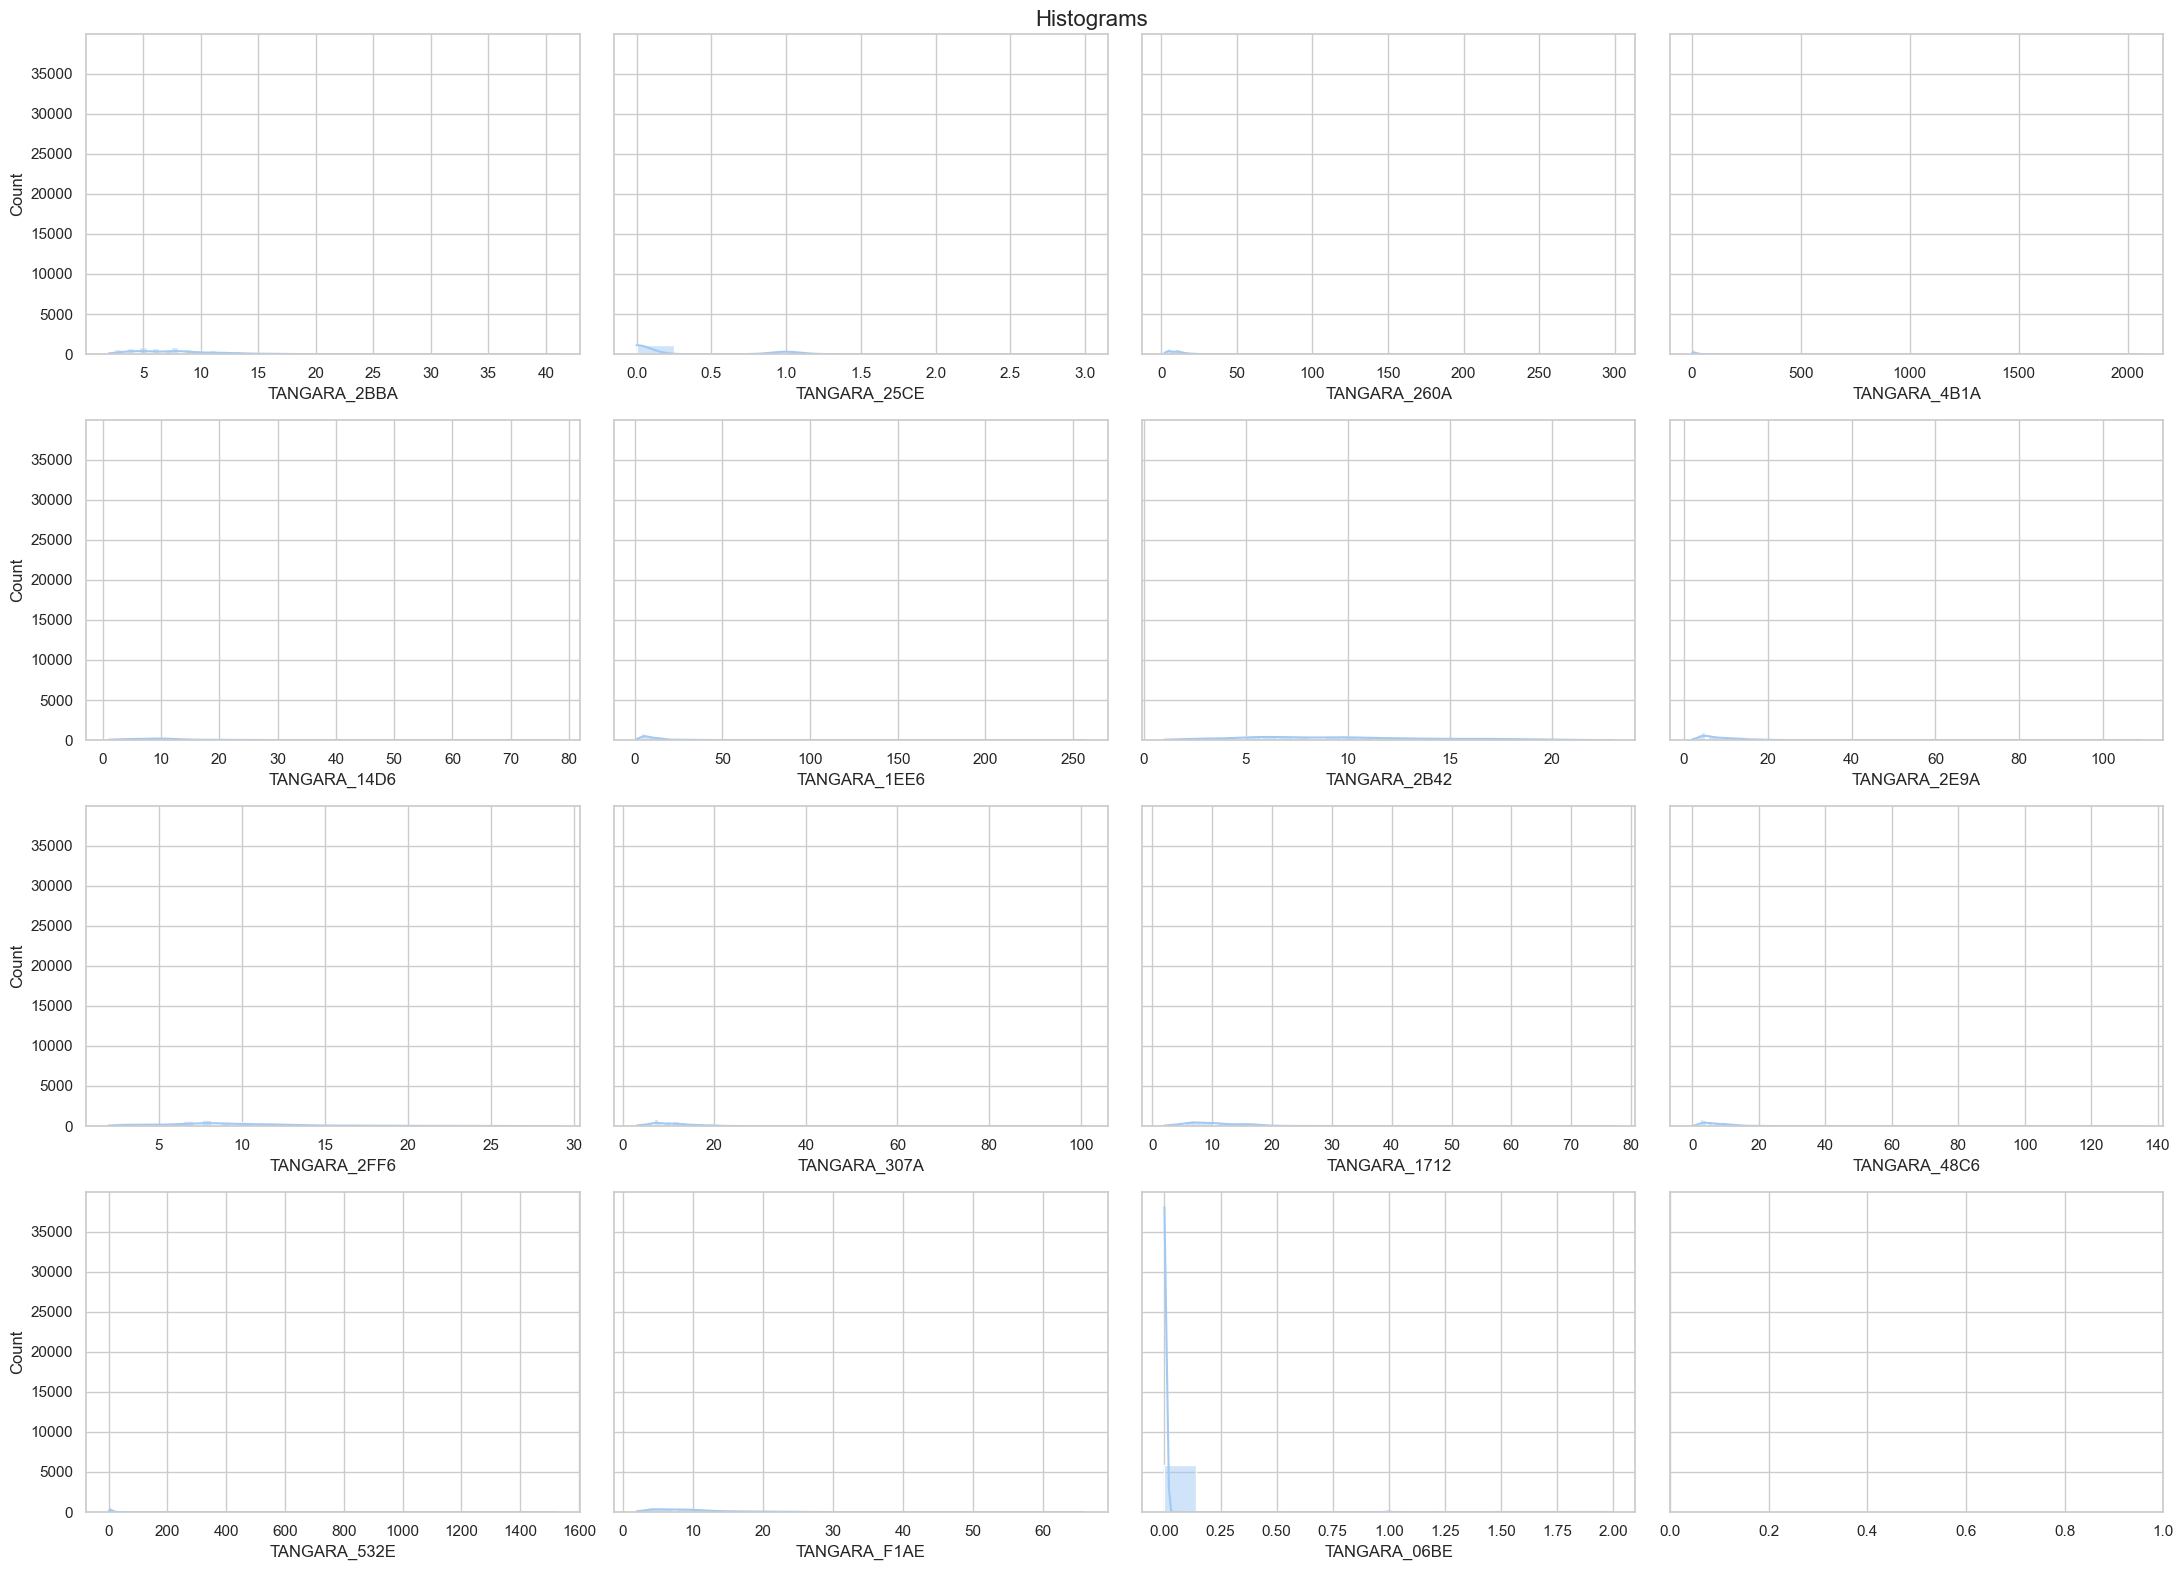

In [6]:
# Plot Histograms
plot_hist(df_pm25_raw)

## Boxplots

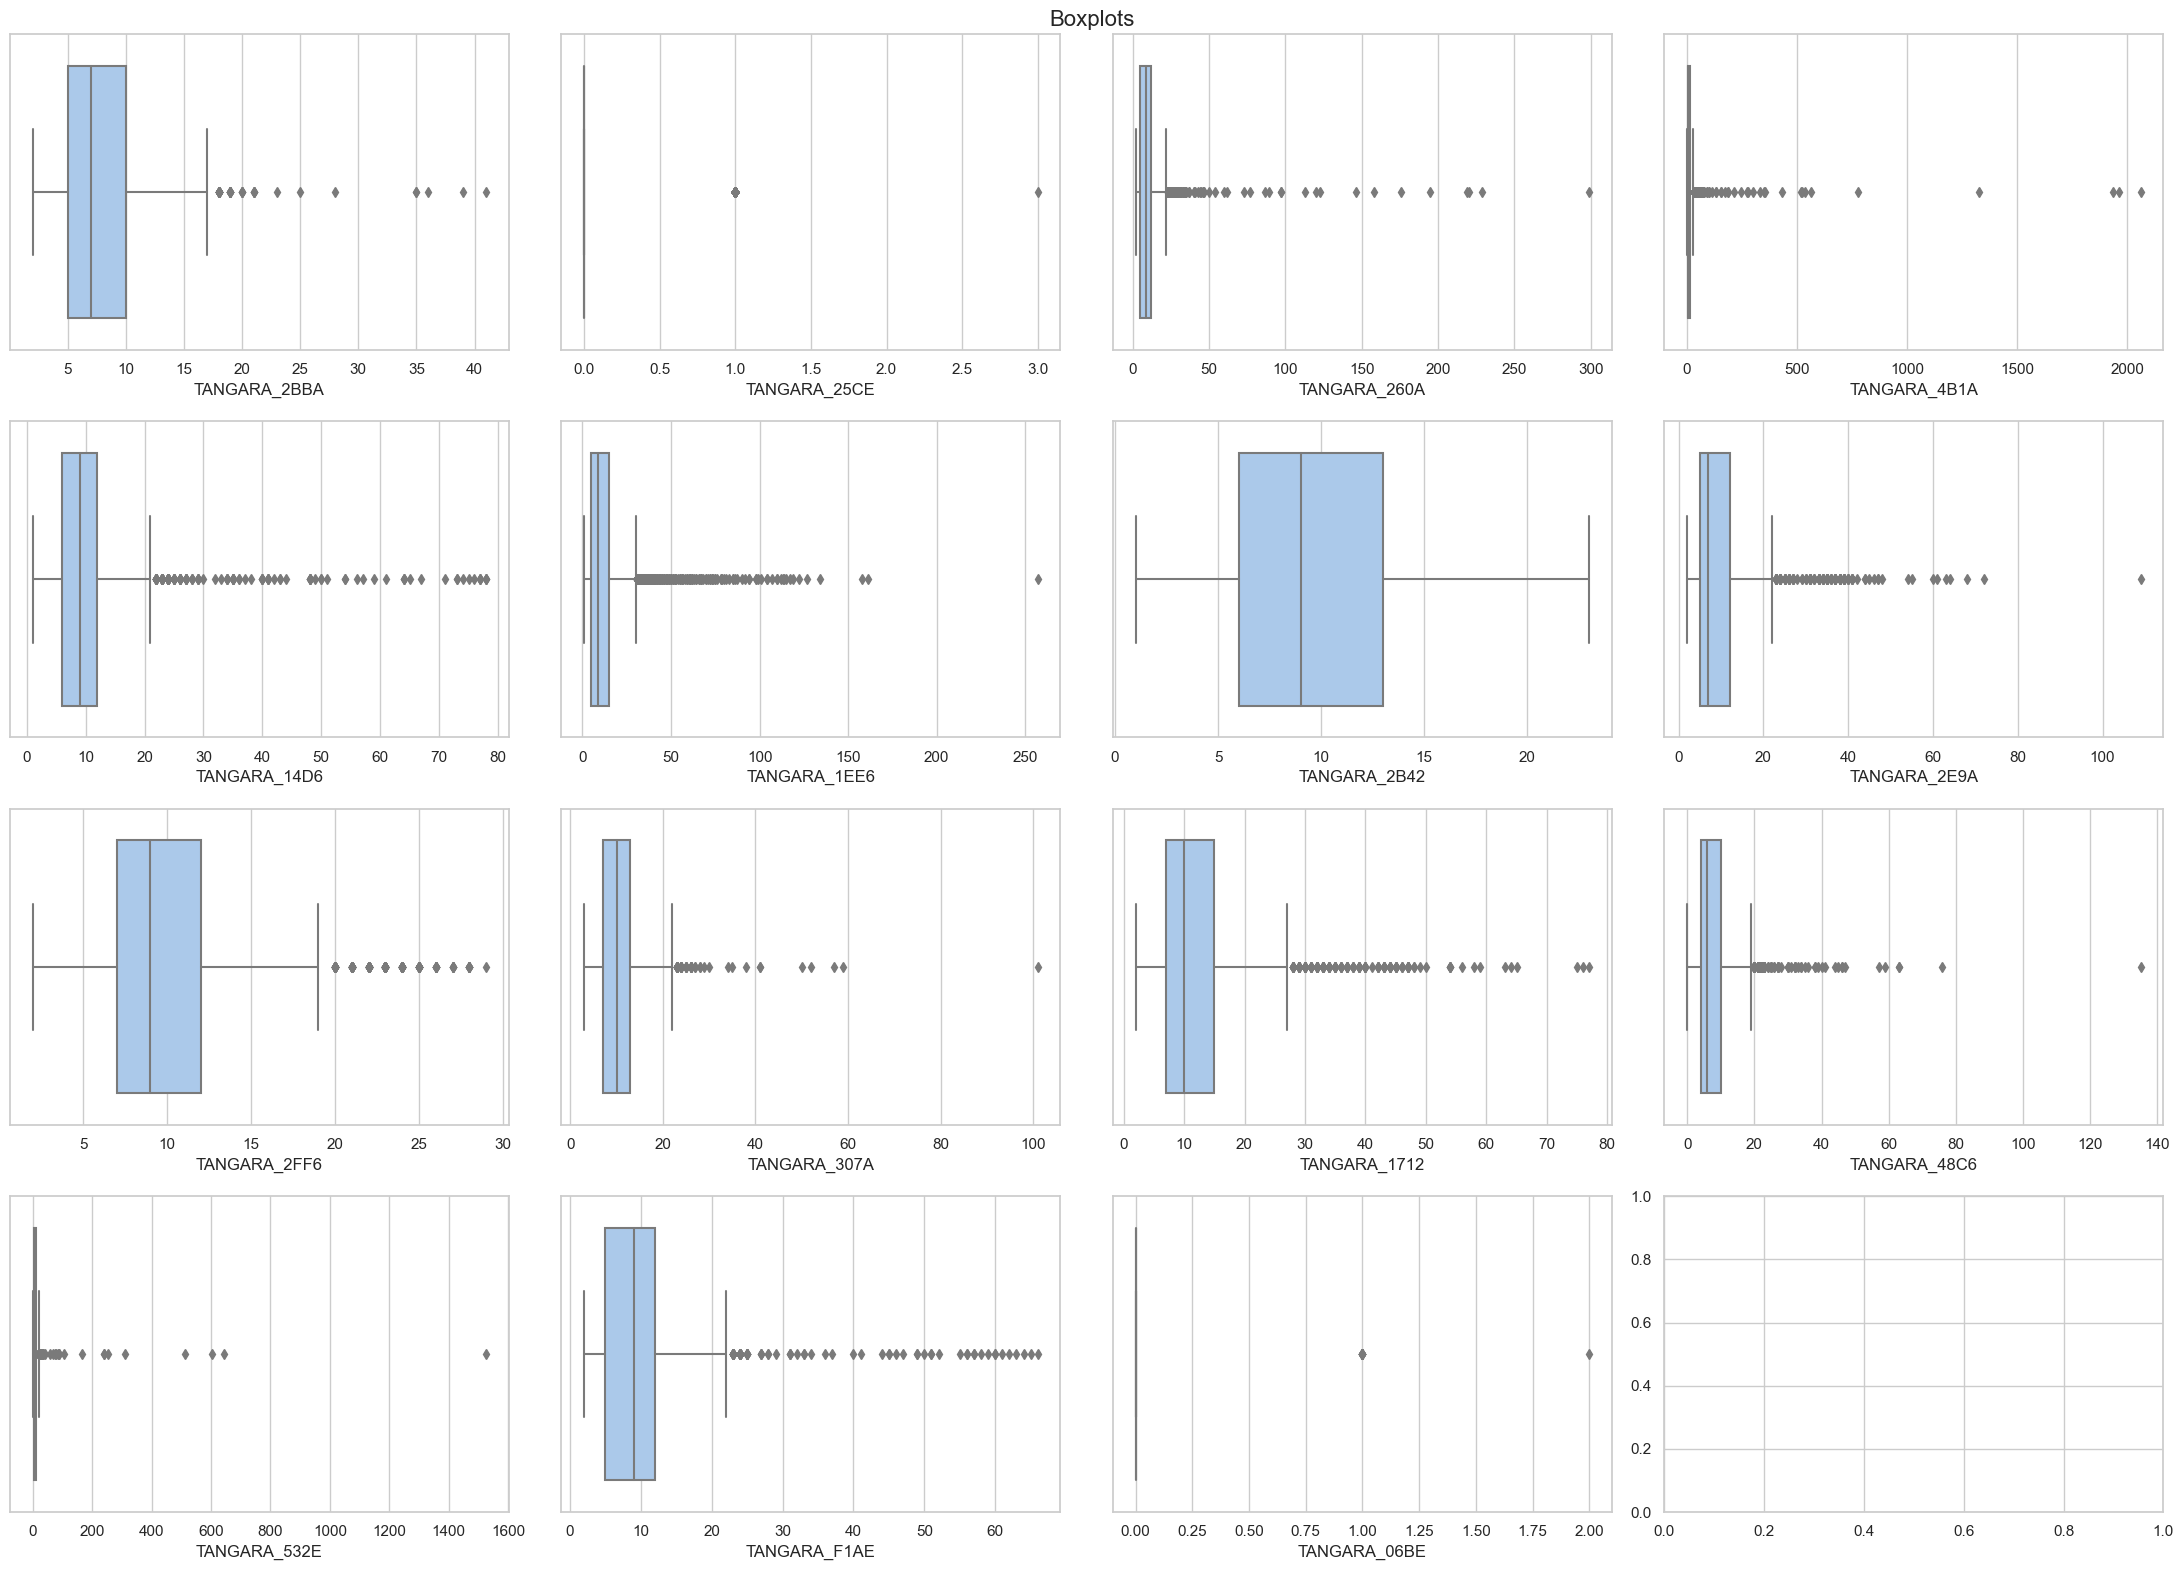

In [7]:
# Plot Boxplots
plot_boxes(df_pm25_raw)

## Lineplots

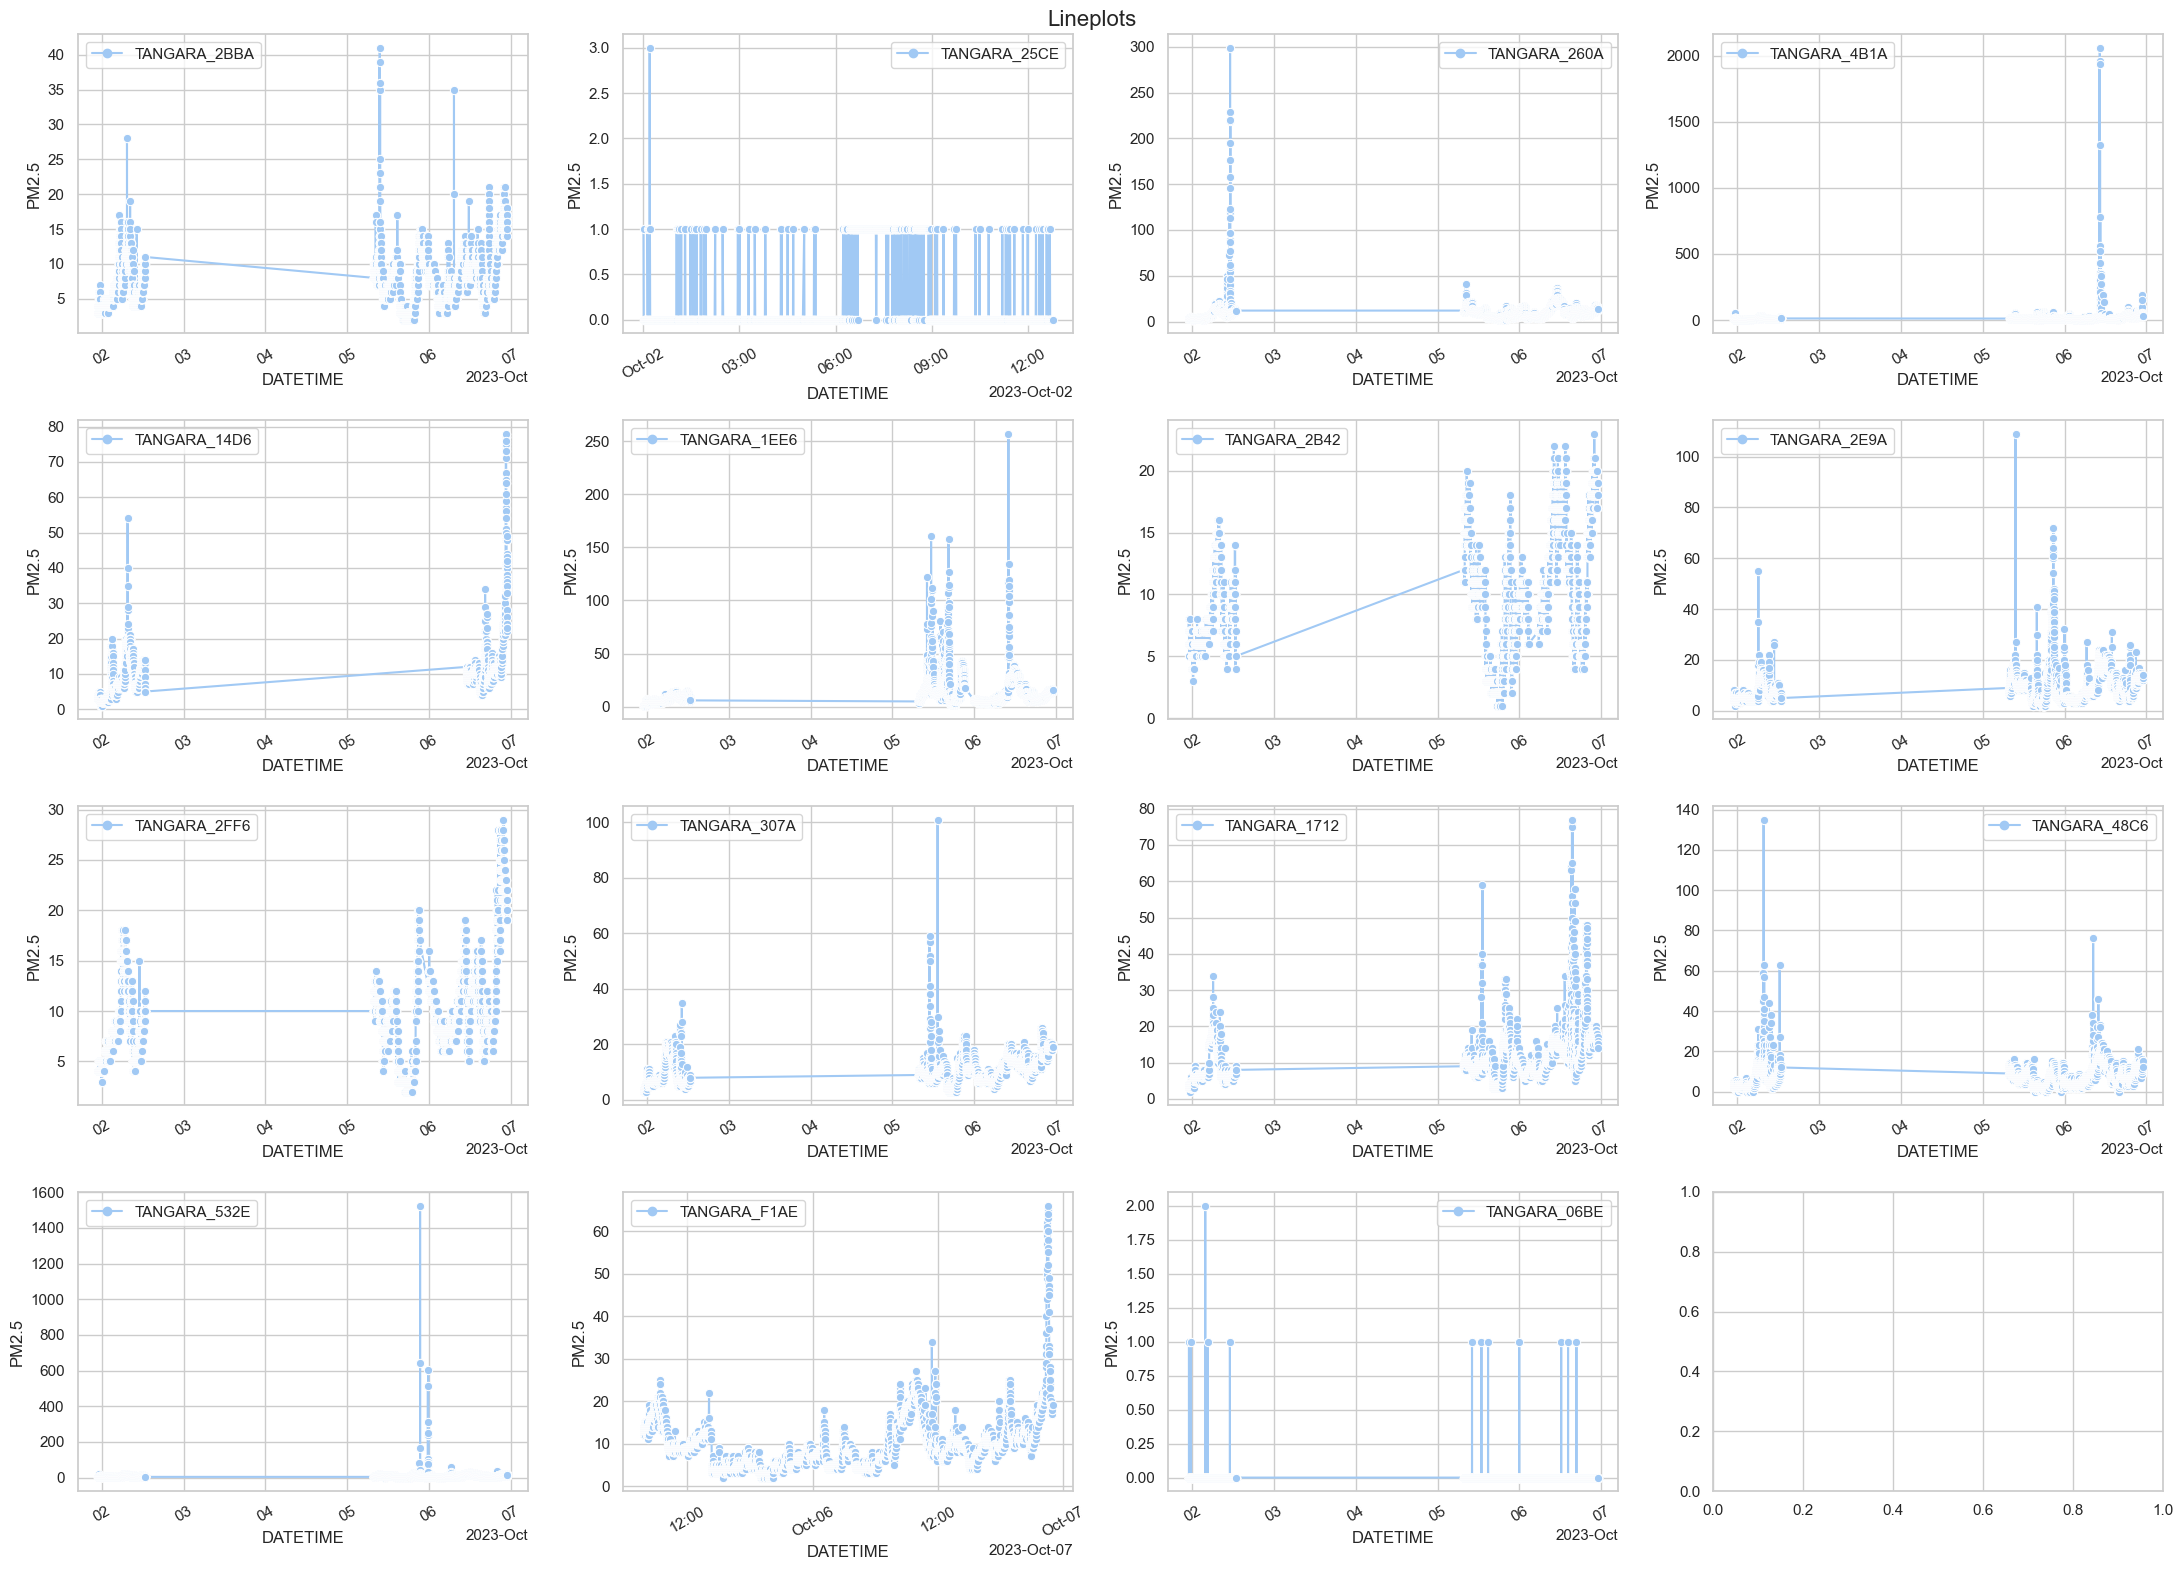

In [8]:
# Plot Lineplots
plot_lines(df_pm25_raw)

## Drop PM2.5 Outliers

In [9]:
# Drop PM2.5 Outliers
df_pm25_clean, resume = drop_pm25_outliers(df_pm25_raw)

In [10]:
# Describe Data
df_pm25_raw.describe()

,TANGARA_2BBA,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,5915.000000,1087.0,5691.000000,5327.000000,2629.000000,5214.000000,5534.000000,5659.000000,5286.000000,5743.000000,5458.000000,5601.000000,5730.000000,4309.000000,5907.0
mean,7.542012,0.0,9.124231,9.982354,9.113731,10.123514,9.505240,8.483831,8.825199,10.477973,10.462624,7.039279,7.948517,9.068461,0.0
std,3.363662,0.0,4.612262,6.635320,4.356934,6.404943,4.623339,4.378909,3.724893,4.240115,4.649623,3.942021,4.675578,4.587051,0.0
min,2.000000,0.0,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.0
25%,5.000000,0.0,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,6.000000,7.000000,7.000000,4.000000,4.000000,5.000000,0.0
50%,7.000000,0.0,9.000000,8.000000,9.000000,8.000000,9.000000,7.000000,8.000000,10.000000,10.000000,6.000000,7.000000,8.000000,0.0
75%,10.000000,0.0,12.000000,13.000000,12.000000,13.000000,13.000000,11.000000,11.000000,13.000000,14.000000,10.000000,11.000000,11.000000,0.0
max,17.000000,0.0,22.000000,30.000000,21.000000,30.000000,23.000000,22.000000,19.000000,22.000000,27.000000,19.000000,21.000000,22.000000,0.0


In [11]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,5915.000000,1087.0,5691.000000,5327.000000,2629.000000,5214.000000,5534.000000,5659.000000,5286.000000,5743.000000,5458.000000,5601.000000,5730.000000,4309.000000,5907.0
mean,7.542012,0.0,9.124231,9.982354,9.113731,10.123514,9.505240,8.483831,8.825199,10.477973,10.462624,7.039279,7.948517,9.068461,0.0
std,3.363662,0.0,4.612262,6.635320,4.356934,6.404943,4.623339,4.378909,3.724893,4.240115,4.649623,3.942021,4.675578,4.587051,0.0
min,2.000000,0.0,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.0
25%,5.000000,0.0,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,6.000000,7.000000,7.000000,4.000000,4.000000,5.000000,0.0
50%,7.000000,0.0,9.000000,8.000000,9.000000,8.000000,9.000000,7.000000,8.000000,10.000000,10.000000,6.000000,7.000000,8.000000,0.0
75%,10.000000,0.0,12.000000,13.000000,12.000000,13.000000,13.000000,11.000000,11.000000,13.000000,14.000000,10.000000,11.000000,11.000000,0.0
max,17.000000,0.0,22.000000,30.000000,21.000000,30.000000,23.000000,22.000000,19.000000,22.000000,27.000000,19.000000,21.000000,22.000000,0.0


## Histograms

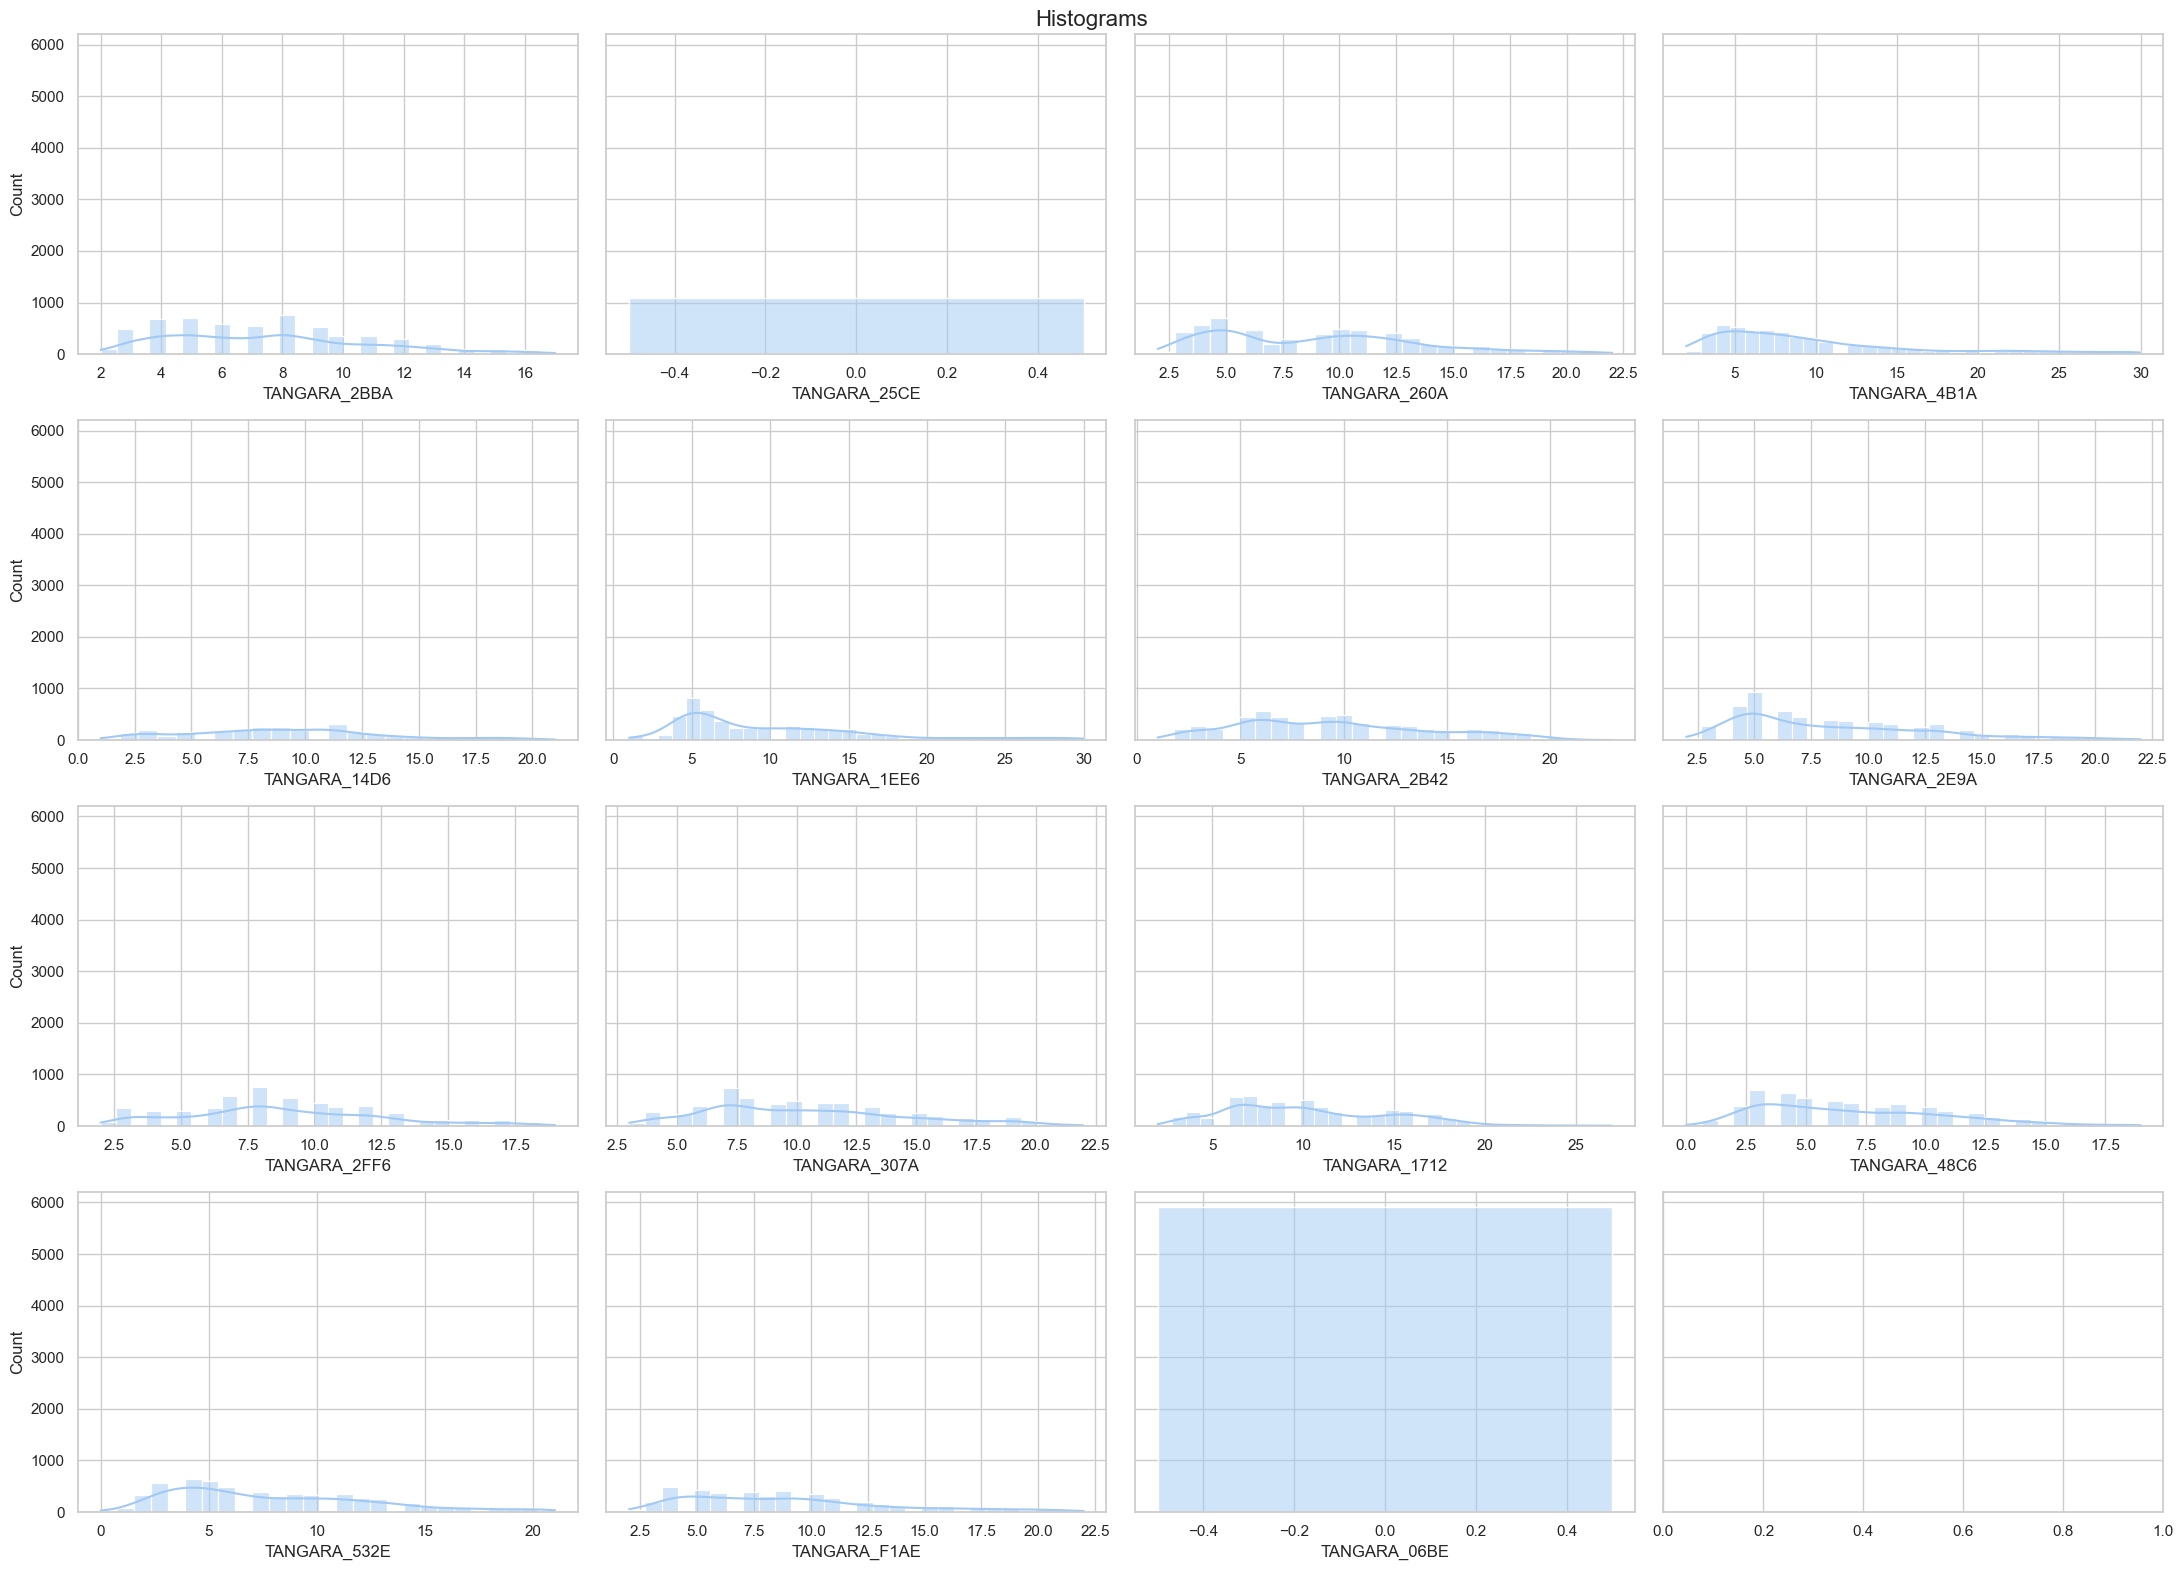

In [12]:
# Plot Histograms
plot_hist(df_pm25_clean)

## Boxplots

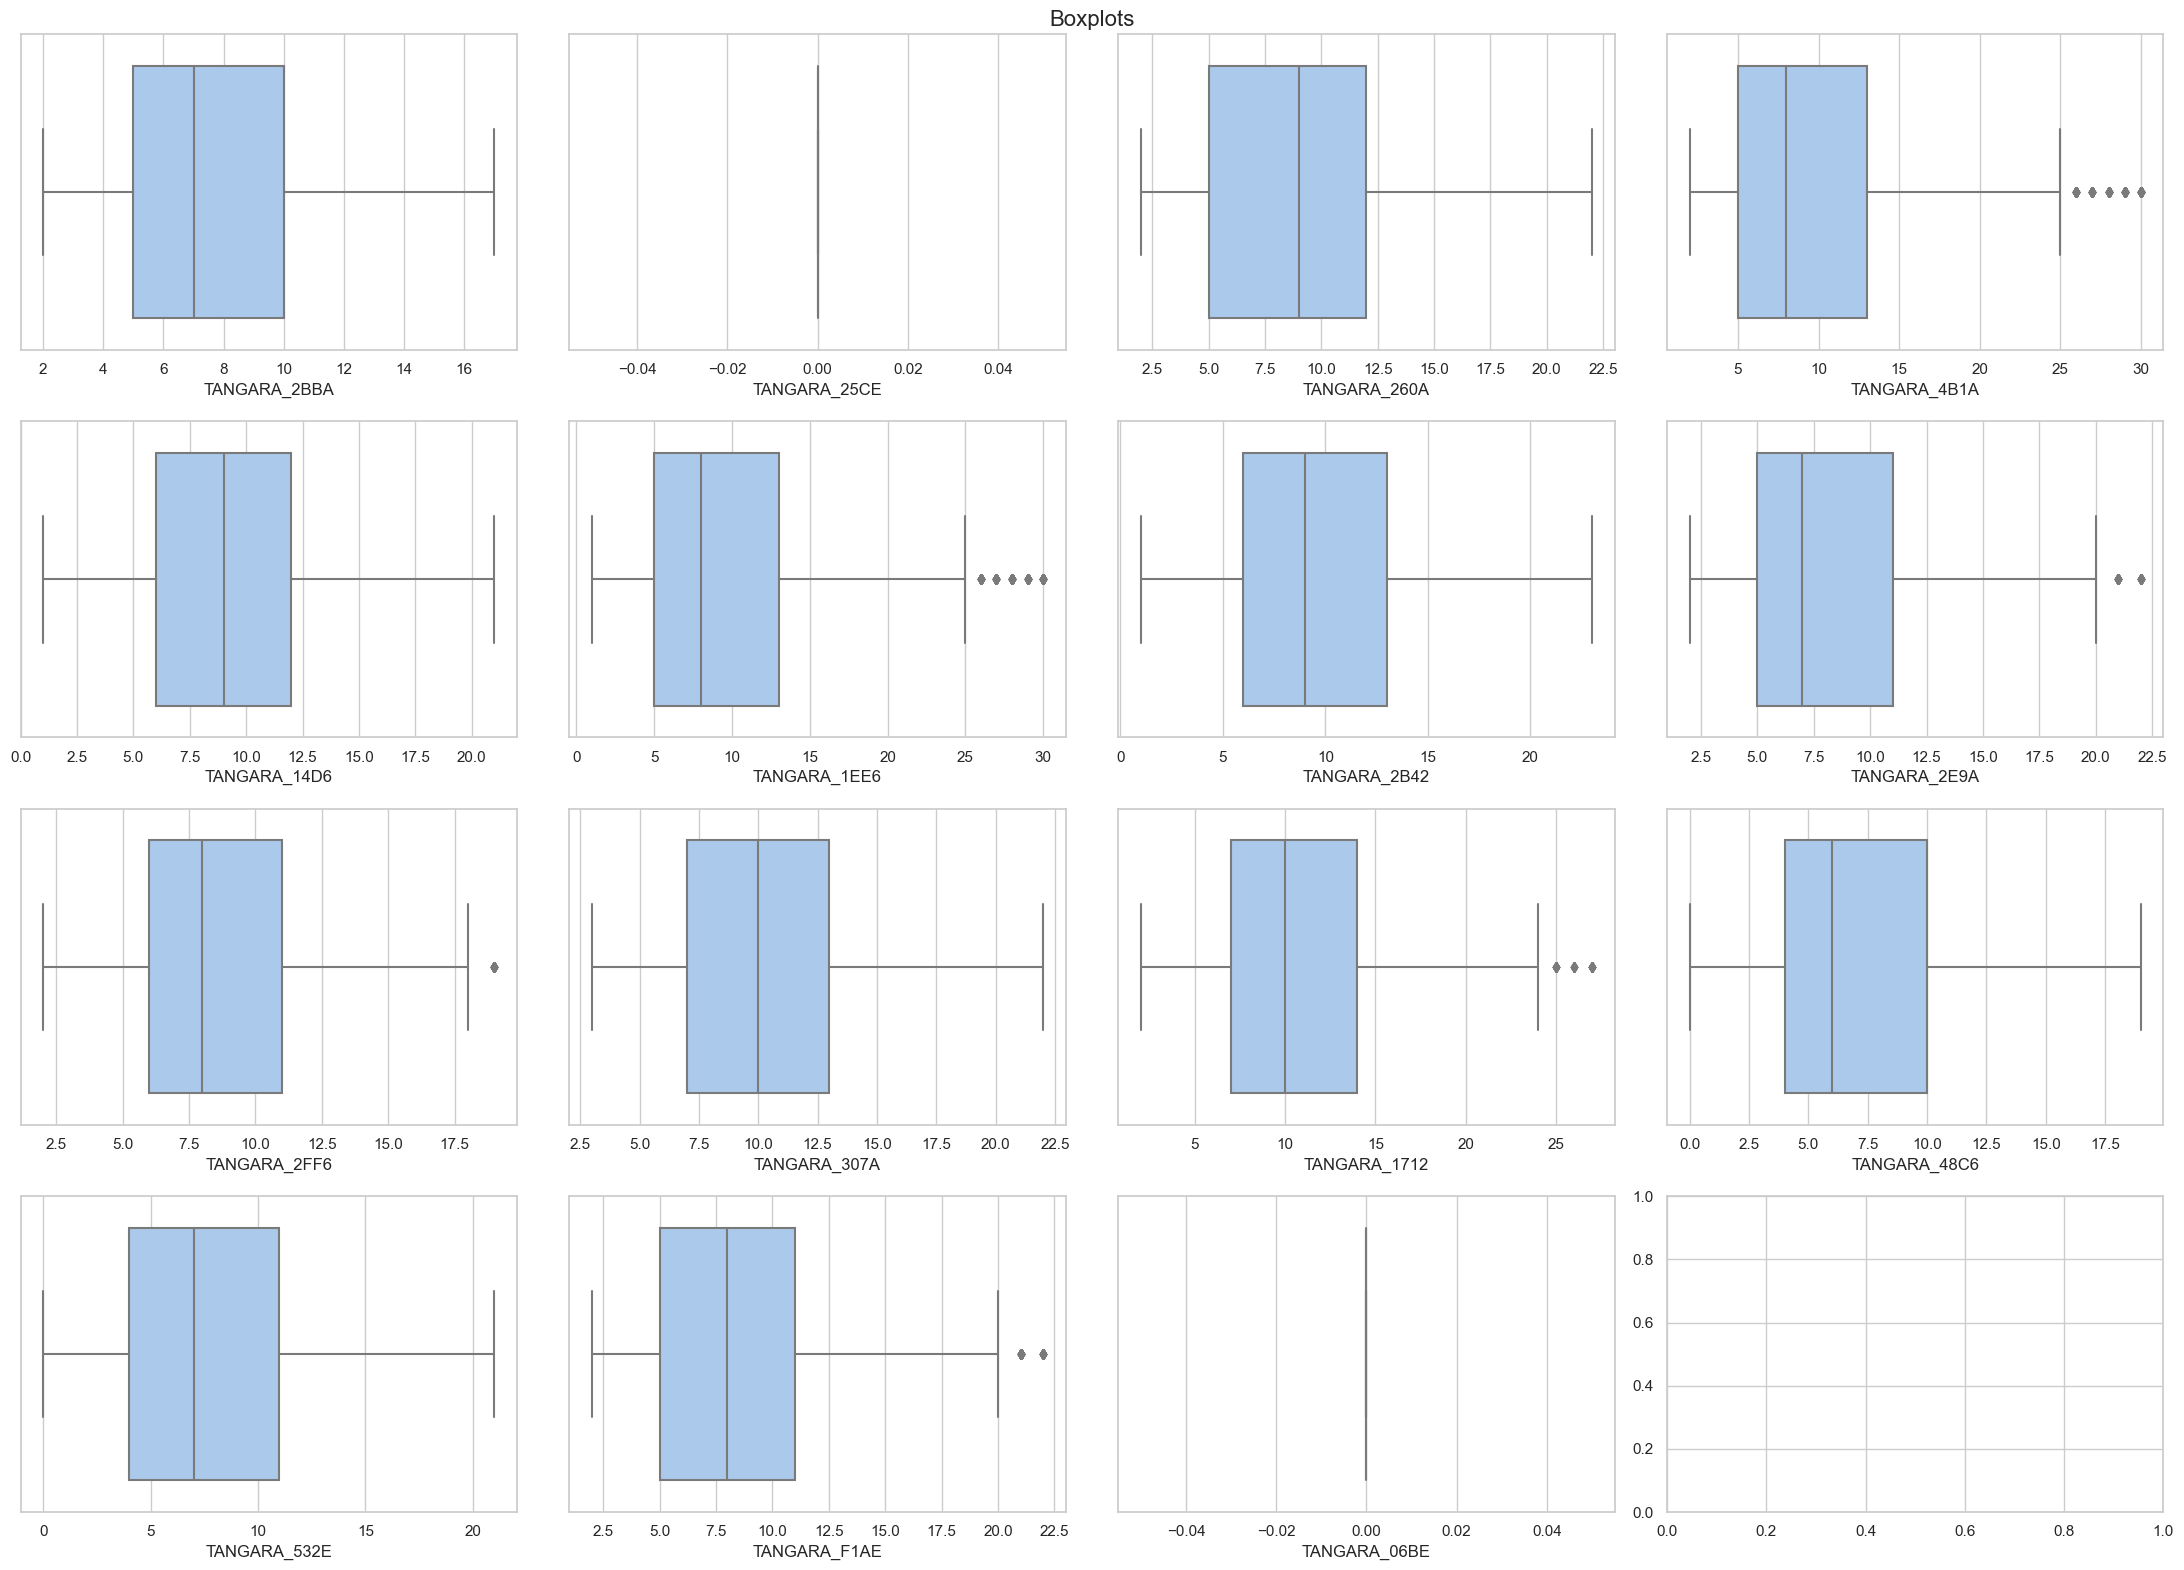

In [13]:
# Plot Boxplots
plot_boxes(df_pm25_clean)

## Lineplots

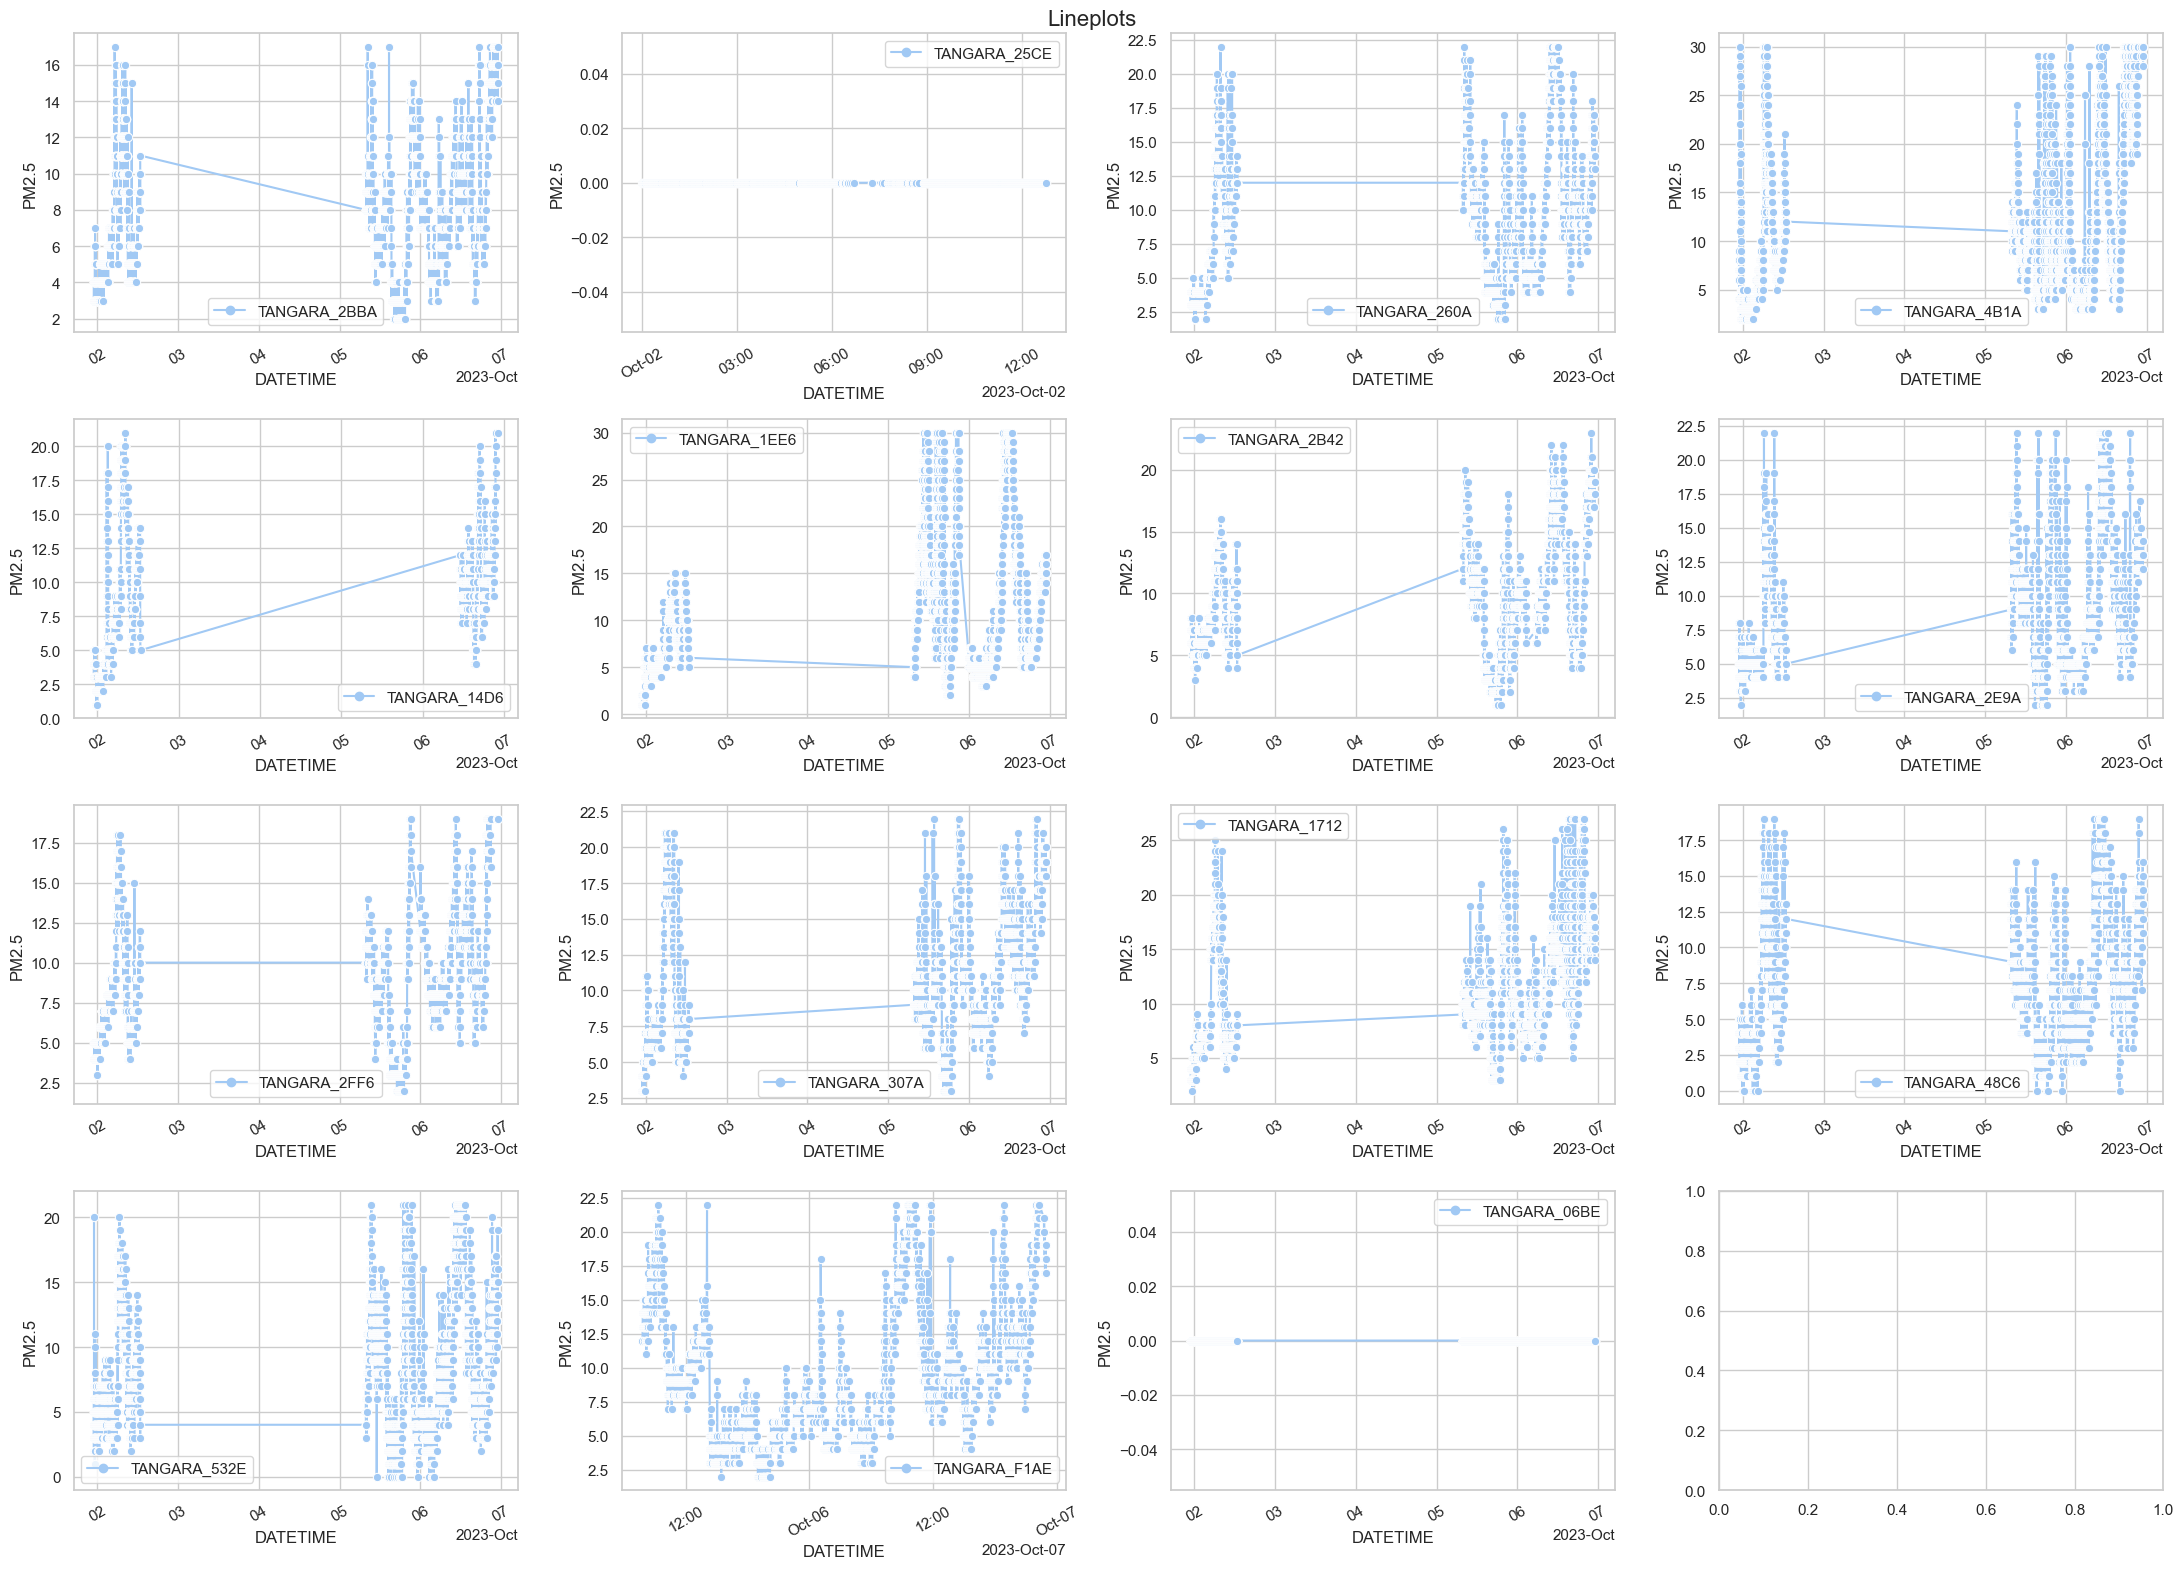

In [14]:
# Plot Lineplots
plot_lines(df_pm25_clean)

In [15]:
# Save PM2.5 Data Frame Sensors into CSV file
df_to_csv(df_pm25_clean, "pm25_clean.csv", datafolder='1_clean')